In [12]:
import quantiacsToolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def bb(a,n=20):
    sma = np.nansum(a[-n:])/n
    std = np.std(a[-n:], ddof=1)
    return sma, sma + 2*std, sma - 2*std

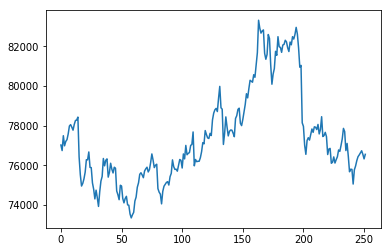

In [7]:
F_AD = pd.read_csv('/home/anshul/Desktop/Quantiacs/tickerData/F_AD.txt')
CLOSE = np.array(F_AD.loc[:252-1, [' CLOSE']])
plt.plot(CLOSE)

In [ ]:
upperBand, lowerBand, smaLine = np.zeros(252-20+1), np.zeros(252-20+1), np.zeros(252-20+1)
for i in range(252-20+1):
    smaLine[i], upperBand[i], lowerBand[i] = bb(CLOSE[i:i+20])
plt.plot(smaLine)   
plt.plot(upperBand)
plt.plot(lowerBand)
plt.plot(CLOSE[20:])

In [21]:
class myStrategy(object):
    
    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):

        def bollingerBands(a, n=20):
            sma = np.nansum(a[-n:]) / n
            std = np.std(a[-n:], ddof=1)
            return sma, sma + 2 * std, sma - 2 * std

        nMarkets = len(settings['markets'])
        threshold = settings['threshold']
        pos = np.zeros((1, nMarkets), dtype=np.float)

        for market in range(nMarkets):
            sma, upperBand, lowerBand = bollingerBands(CLOSE[:, market])
            currentPrice = CLOSE[-1, market]

            if currentPrice >= upperBand + (upperBand - lowerBand) * threshold:
                pos[0, market] = -1
            elif currentPrice <= lowerBand - (upperBand - lowerBand) * threshold:
                pos[0, market] = 1

        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        # Futures Contracts
        settings['markets'] = ['CASH', 'F_AD', 'F_BO', 'F_BP', 'F_C', 'F_CC', 'F_CD',
                               'F_CL', 'F_CT', 'F_DX', 'F_EC', 'F_ED', 'F_ES', 'F_FC', 'F_FV', 'F_GC',
                               'F_HG', 'F_HO', 'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_MD', 'F_MP',
                               'F_NG', 'F_NQ', 'F_NR', 'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_RB', 'F_RU',
                               'F_S', 'F_SB', 'F_SF', 'F_SI', 'F_SM', 'F_TU', 'F_TY', 'F_US', 'F_W', 'F_XX',
                               'F_YM']

        settings['beginInSample'] = '19900101'
        settings['endInSample'] = '20170522'
        settings['lookback'] = 20
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05

        settings['threshold'] = 0.3

        return settings

copying data from cache
Evaluating Trading System <class '__main__.myStrategy'>


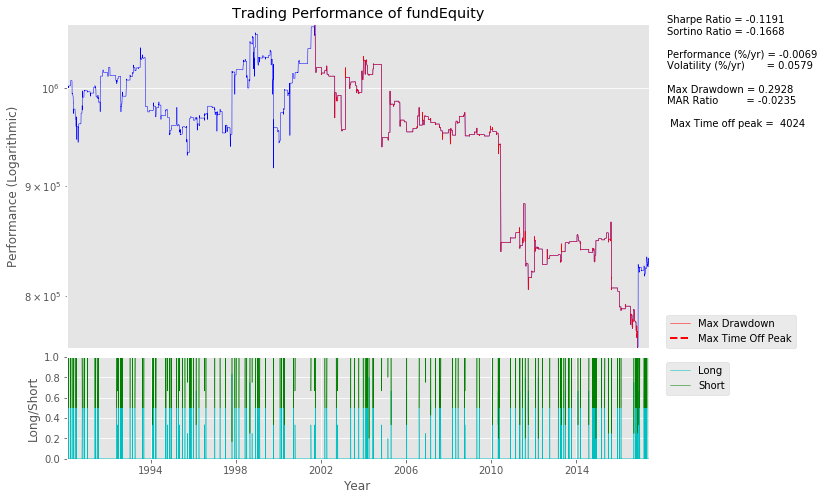

In [24]:
result = quantiacsToolbox.runts(myStrategy)